Los resultados del modelo del Homework 5, de la clase 3 fueron satisfactorios, pero se tiene interés en conocer si aplicando redes neuronales se pueden obtener mejores clasificadores.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
sns.set()

In [18]:
from IPython.display import clear_output

In [19]:
df_conversiones = pd.read_csv("../Datasets/conversiones.csv", sep=",")

In [20]:
df_conversiones.head()

,Costo1,Costo2,Topico,Quincena,TipoProducto,Conversion
0,0.341,0.299,2,7,1,Si
1,0.151,0.079,2,8,1,Si
2,0.384,0.324,4,9,1,Si
3,0.200,0.192,4,9,1,Si
4,0.415,0.020,2,8,1,Si


In [21]:
df_conversiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319946 entries, 0 to 319945
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Costo1        319946 non-null  float64
 1   Costo2        319946 non-null  float64
 2   Topico        319946 non-null  int64  
 3   Quincena      319946 non-null  int64  
 4   TipoProducto  319946 non-null  int64  
 5   Conversion    319946 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 14.6+ MB


In [22]:
df_conversiones.describe()

,Costo1,Costo2,Topico,Quincena,TipoProducto
count,319946.000000,319946.000000,319946.000000,319946.000000,319946.000000
mean,0.349474,0.361730,2.966194,12.845168,4.502994
std,0.270063,0.278102,1.172870,6.493443,2.179622
min,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.134000,0.138000,2.000000,7.000000,3.000000
50%,0.273000,0.280000,3.000000,13.000000,5.000000
75%,0.502000,0.556000,4.000000,19.000000,6.000000
max,1.000000,1.000000,5.000000,24.000000,8.000000


In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_conversiones['Conversion'] = le.fit_transform(df_conversiones['Conversion'])

In [24]:
df_conversiones['Topico'] = df_conversiones['Topico'] / 5

In [25]:
df_conversiones['Quincena'] = df_conversiones['Quincena'] / 24

In [26]:
df_conversiones['TipoProducto'] = df_conversiones['TipoProducto'] / 8

In [27]:
df_conversiones.describe()

,Costo1,Costo2,Topico,Quincena,TipoProducto,Conversion
count,319946.000000,319946.000000,319946.000000,319946.000000,319946.000000,319946.000000
mean,0.349474,0.361730,0.593239,0.535215,0.562874,0.499934
std,0.270063,0.278102,0.234574,0.270560,0.272453,0.500001
min,0.000000,0.000000,0.200000,0.041667,0.125000,0.000000
25%,0.134000,0.138000,0.400000,0.291667,0.375000,0.000000
50%,0.273000,0.280000,0.600000,0.541667,0.625000,0.000000
75%,0.502000,0.556000,0.800000,0.791667,0.750000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

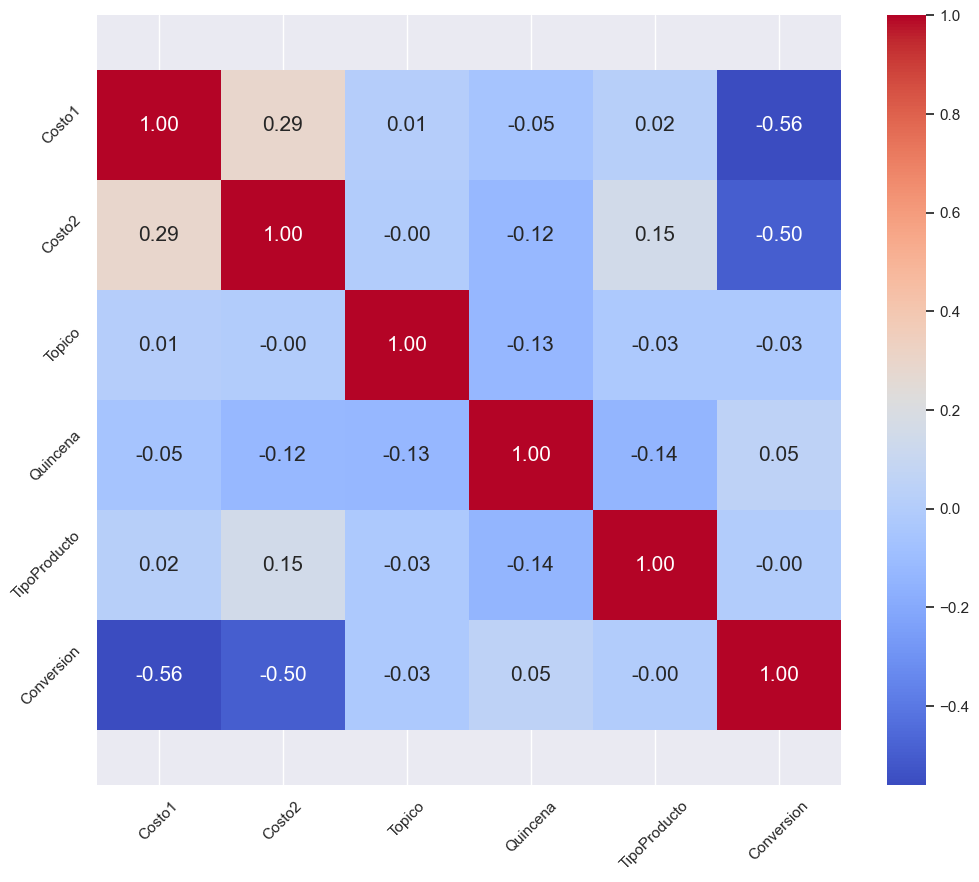

In [29]:
corr = df_conversiones.corr()
plot_corre_heatmap(corr)

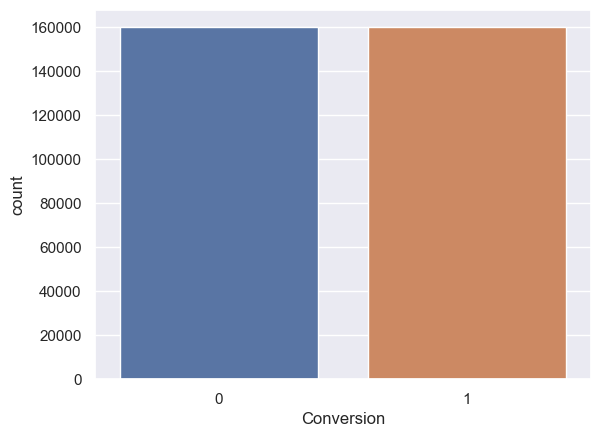

In [30]:
sns.countplot(x='Conversion', data=df_conversiones) #equivelante a sns.countplot(df_conversiones.Conversion)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df_conversiones[['Costo1','Costo2','Topico','Quincena','TipoProducto']]
y = df_conversiones['Conversion']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

In [35]:
X_train.shape

(255956, 5)

In [36]:
from keras import models
from keras import layers
from keras.utils.vis_utils import plot_model

In [37]:
red = models.Sequential()
red.add(layers.Dense(5, activation='relu', input_shape=(5,)))
#red.add(layers.Dense(3, activation='relu'))
red.add(layers.Dense(1, activation='sigmoid'))

In [38]:
red.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [39]:
plot_model(red, show_shapes=True, show_layer_names=True) #to_file='red.png', 

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [40]:
entrenamiento = red.fit(X_train, y_train, epochs=80, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/80


500/500 [==============================] - 1s 2ms/step - loss: 0.6179 - acc: 0.6999 - val_loss: 0.5198 - val_acc: 0.8076
Epoch 2/80
500/500 [==============================] - 1s 1ms/step - loss: 0.4561 - acc: 0.8205 - val_loss: 0.4111 - val_acc: 0.8297
Epoch 3/80
500/500 [==============================] - 1s 1ms/step - loss: 0.4010 - acc: 0.8292 - val_loss: 0.3918 - val_acc: 0.8323
Epoch 4/80
500/500 [==============================] - 1s 1ms/step - loss: 0.3891 - acc: 0.8322 - val_loss: 0.3809 - val_acc: 0.8375
Epoch 5/80
500/500 [==============================] - 1s 1ms/step - loss: 0.3781 - acc: 0.8362 - val_loss: 0.3712 - val_acc: 0.8397
Epoch 6/80
500/500 [==============================] - 1s 1ms/step - loss: 0.3696 - acc: 0.8394 - val_loss: 0.3634 - val_acc: 0.8423
Epoch 7/80
500/500 [==============================] - 1s 1ms/step - loss: 0.3626 - acc: 0.8427 - val_loss: 0.3570 - val_acc: 0.8441
Epoch 8/80
500/500 [==============================] - 1s 1ms/step - loss: 0.3568 - acc:

In [41]:
epochs = range(1, 81)
loss = entrenamiento.history['loss']
acc = entrenamiento.history['acc']
val_loss = entrenamiento.history['val_loss']
val_acc = entrenamiento.history['val_acc']

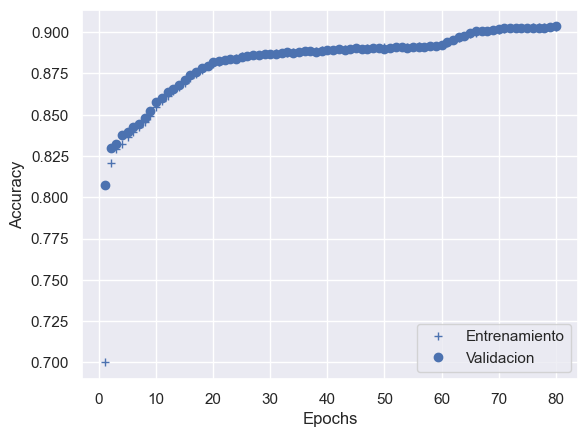

In [42]:
# b+ is for "blue cross"
plt.plot(epochs, acc, 'b+', label='Entrenamiento')
# "bo" is for "blue dot"
plt.plot(epochs, val_acc, 'bo', label='Validacion')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

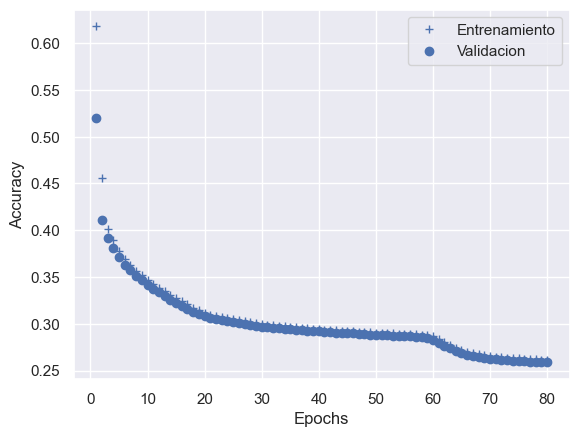

In [43]:
# b+ is for "blue cross"
plt.plot(epochs, loss, 'b+', label='Entrenamiento')
# "bo" is for "blue dot"
plt.plot(epochs, val_loss, 'bo', label='Validacion')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [44]:
test_loss, test_acc = red.evaluate(X_test, y_test)

2000/2000 [==============================] - 2s 944us/step - loss: 0.2587 - acc: 0.9035


In [45]:
print('test_acc:', test_acc)

test_acc: 0.9035005569458008
